In [203]:
import pandas as pd
import numpy as np

Training and test data was pre-seperated, so the individual files were uploaded and labeled accordingly.

In [204]:
train_dataset = pd.read_csv('C:\\Users\\matth\\OneDrive\\Documents\\Machine Learnings\\titanic\\train.csv')
test_dataset = pd.read_csv('C:\\Users\\matth\\OneDrive\\Documents\\Machine Learnings\\titanic\\test.csv')

"PassengerId" was droped, due to repetative with the index

In [205]:
train_dataset = train_dataset.drop('PassengerId', axis=1)

In [206]:
train_dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [207]:
train_dataset["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [208]:
train_dataset['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [209]:
train_dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [210]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


**Notes for object class:**
* Name will not be needed
* Sex will need to be hot-oneencoded
* Embarked need hot-oneencoded
* One encode the cabin?

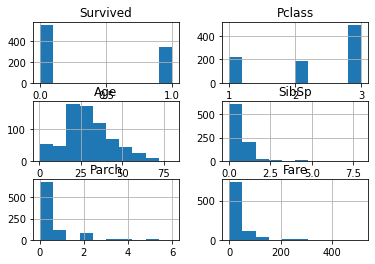

In [211]:
train_dataset.hist();

Standaradizing the data:
1. divide the training data into features and label
2. hot-encode data
3. standarizition of the data
4. run through initial linear regression

In [212]:
train_X = train_dataset.drop("Survived", axis=1)
train_y = train_dataset["Survived"]

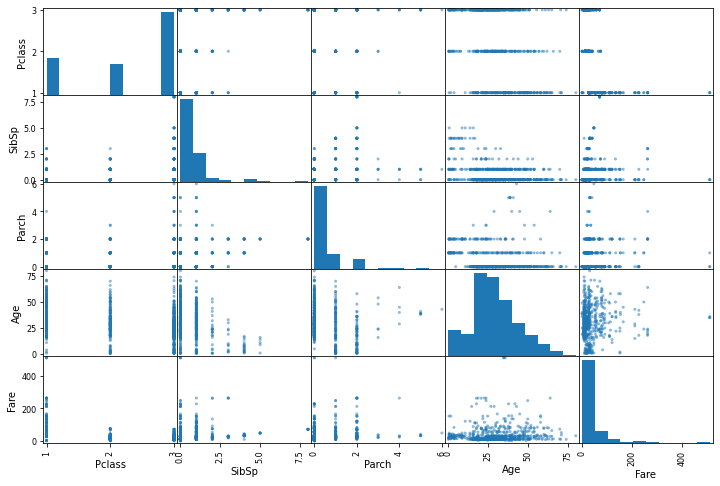

In [213]:
from pandas.plotting import scatter_matrix

# Let's just take a look at the current data and see how it interprets
attributes = ['Pclass', 'SibSp', 'Parch', 'Age', 'Fare']
scatter_matrix(train_X[attributes], figsize=(12,8));

Convert the "Name" into a "Surname" column to help evaluate the missing ages

In [214]:
train_X["Surname"] = train_X["Name"].str.split(".").str.get(0)
train_X['Surname'] = train_X["Surname"].str.split(", ").str.get(-1)
train_X["Surname"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Surname, dtype: int64

Fill nan data in the "Age" column with the mean, based from the Surname

In [215]:
train_X["Age"] = train_X["Age"].fillna(train_X.groupby("Surname")["Age"].transform('mean'))

**I know the data screams to try a binary classification,** but I wanted to at least try a linear regression.

In [216]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

num_data = train_X[['Pclass', 'SibSp', 'Parch', 'Age', 'Fare']]
cat_data = train_X[['Sex','Cabin','Embarked','Surname']]
# Function created to onehotencode the categorical data
def HotCoder(cat_data=cat_data, dataset=train_X):
    # Option 1:
    enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
    enc.fit(cat_data)

    temp_df = pd.DataFrame(data=enc.transform(cat_data), columns=enc.get_feature_names_out())
    dataset.drop(columns=cat_data, axis=1, inplace=True)
    df = pd.concat([dataset.reset_index(drop=True), temp_df], axis=1)
    
    return df

In [217]:
# MinMaxScaler for the numerical values
def numerical_data(num_data = num_data):
    # num_data = num_data.notna()
    scaler = MinMaxScaler().fit_transform(num_data)
    return scaler


In [218]:
scaled = numerical_data(num_data)
scaled

array([[1.        , 0.125     , 0.        , 0.27117366, 0.01415106],
       [0.        , 0.125     , 0.        , 0.4722292 , 0.13913574],
       [1.        , 0.        , 0.        , 0.32143755, 0.01546857],
       ...,
       [1.        , 0.125     , 0.33333333, 0.26833341, 0.04577135],
       [0.        , 0.        , 0.        , 0.32143755, 0.0585561 ],
       [1.        , 0.        , 0.        , 0.39683338, 0.01512699]])

In [219]:
cat_data_def = HotCoder(cat_data, train_X)
cat_data_def.head()

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Cabin_A10,...,Surname_Master,Surname_Miss,Surname_Mlle,Surname_Mme,Surname_Mr,Surname_Mrs,Surname_Ms,Surname_Rev,Surname_Sir,Surname_the Countess
0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [220]:
ftrained_X = cat_data_def
ftrained_X[attributes] = scaled

In [221]:
final_drop = ["Name", "Ticket"]
for x in final_drop:
    ftrained_X = ftrained_X.drop(x, axis=1)

In [222]:
ftrained_X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,...,Surname_Master,Surname_Miss,Surname_Mlle,Surname_Mme,Surname_Mr,Surname_Mrs,Surname_Ms,Surname_Rev,Surname_Sir,Surname_the Countess
0,1.0,0.271174,0.125,0.000000,0.014151,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.472229,0.125,0.000000,0.139136,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.321438,0.000,0.000000,0.015469,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.434531,0.125,0.000000,0.103644,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.434531,0.000,0.000000,0.015713,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,0.025374,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
887,0.0,0.233476,0.000,0.000000,0.058556,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,1.0,0.268333,0.125,0.333333,0.045771,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
889,0.0,0.321438,0.000,0.000000,0.058556,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Train a Model

In [223]:
# Train to see if the perons survives
train_y_1 = (train_y == 1)

In [224]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(ftrained_X, train_y_1)

SGDClassifier(random_state=42)

In [244]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, ftrained_X, train_y_1, cv=5, scoring="accuracy")

array([0.78212291, 0.7247191 , 0.80337079, 0.75842697, 0.86516854])

In [246]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, ftrained_X, train_y_1, cv= 5)

In [247]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_y_1, y_train_pred)

array([[460,  89],
       [101, 241]], dtype=int64)

In [248]:
from sklearn.metrics import precision_score, recall_score

precision_score(train_y_1, y_train_pred)

0.7303030303030303

In [249]:
recall_score(train_y_1, y_train_pred)

0.7046783625730995

In [250]:
from sklearn.metrics import f1_score
f1_score(train_y_1, y_train_pred)

0.7172619047619048

In [251]:
y_scores = cross_val_predict(sgd_clf, ftrained_X, train_y_1, cv=5,
                             method='decision_function')

In [253]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(train_y_1, y_scores)

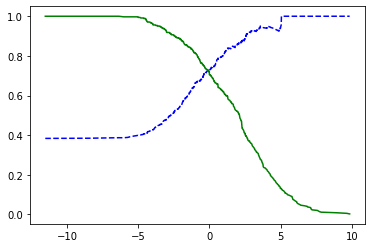

In [254]:
import matplotlib.pyplot as plt
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g-", label='recall')

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [255]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_y_1, y_scores)

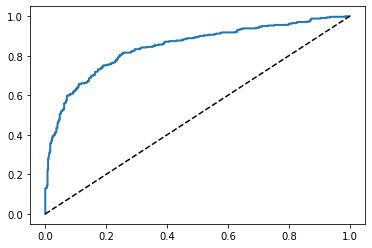

In [256]:
# 2. plot the RPR agains the TPR in matplotlib

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--') # dashed diagonal
    [...] #add axis labels and grid

plot_roc_curve(fpr, tpr)
plt.show();

In [258]:
from sklearn.metrics import roc_auc_score

roc_auc_score(train_y_1, y_scores)

0.8449600017043215

In [259]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, ftrained_X, train_y_1, cv=5,
                                    method="predict_proba")

In [260]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_y_1, y_scores_forest)

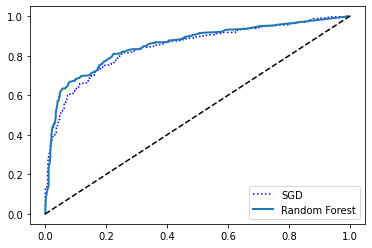

In [261]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show();

In [263]:
roc_auc_score(train_y_1, y_scores_forest)

0.8574494828449388